<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/inteligencia_guia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guia Practica 2 IC 2023

## Ejercicio 1
Implemente el algoritmo de retropropagacion para un perceptron multicapa de forma que se pueda elegir libremente la cantidad de capas de la red y de neuronas en cada capa. Pruebelo entrenando una red de estructura apropiada para resolver el problema XOR, con sus particiones de entrenamiento y prueba correspondientes (datos de la Guıa de Trabajos Practicos 1).

In [ ]:
# cargamos los datos de entrenamiento
import numpy as np
datos_entrenamiento = np.genfromtxt("XOR_trn.csv", delimiter="," , skip_header=1)
datos_entrenamiento = datos_entrenamiento[0:99]

datos_ej1 = np.insert(datos_entrenamiento,0,-1,axis=1)
print(datos_ej1[0:9])

[[-1.       1.0325  -1.0188   1.     ]
 [-1.       1.0261   1.0343  -1.     ]
 [-1.       0.98587  0.97163 -1.     ]
 [-1.       1.006   -1.0311   1.     ]
 [-1.       1.0009  -1.0062   1.     ]
 [-1.       0.99489  1.0052  -1.     ]
 [-1.      -0.96894  1.018    1.     ]
 [-1.       0.99215 -1.0158   1.     ]
 [-1.      -1.01     1.0341   1.     ]]


In [ ]:
# definimos el tamaño de la red y la cantidad de neuronas en cada capa
red_size = [2,1]


In [ ]:
# defino la matriz de pesos
pesos_ej1 = []
pesos_ej1.append(np.random.rand(red_size[0],len(datos_entrenamiento[0]))-0.5)
for i in np.arange(1,len(red_size)):
  pesos_ej1.append(np.random.rand(red_size[i],red_size[i-1]+1)-0.5)
print(pesos_ej1)

[array([[ 0.08478709, -0.14753679,  0.40492297],
       [ 0.24604563,  0.3887169 ,  0.19189366]]), array([[0.03911295, 0.49494471, 0.28389964]])]


In [ ]:
def sigmoid(x,a):
  return (2 / (1 + np.exp(-x*a))) - 1

In [ ]:
def neurona(entradas_v,pesos_v,a):
  v = np.dot(entradas_v,pesos_v)
  return sigmoid(v,a)

In [ ]:
def sigmoid_v(x,a):
  res = np.zeros(len(x))
  for i in np.arange(0,len(x)):
    res[i] = (2 / (1 + np.exp(-x[i]*a))) - 1
  return res

In [ ]:
def propagacion_adelante(entradas,pesos,red_size,a):
  y_v = [entradas]   # entradas = [-1,w1,w2] , y_v =[[-1,w1,w2]]
  for i in np.arange(0,len(red_size)):  # recorro las capas de la red
    pesos_capa = pesos[i]
    #print('capa ',i+1)
    #print('pesos :',pesos_capa)
    y = []
    entrada_aux = y_v[i]
    if (i > 0):  # opcion: if(i!=0)
      entrada_aux = np.insert(entrada_aux,0,-1)
    y_v.append(sigmoid_v(np.dot(pesos_capa,entrada_aux),a))
  return y_v[1:len(y_v)]

# def propagacion_adelante(entradas,pesos,red_size,a):
#   #print(entradas," aa ", pesos[0])
#   y_v = [sigmoid_v(np. dot(pesos[0],entradas),a)]  # entradas = [-1,x1,x2] , y_v =[[-1,x1,x2]]
#   for i in np.arange(1,len(red_size)):  # recorro las capas de la red
#     entrada_aux = y_v[i-1]
#     entrada_aux = np.insert(entrada_aux,0,-1)
#     y_v.append(sigmoid_v(np.dot(pesos[i],entrada_aux),a))
# return y_v

In [ ]:
def calculo_error(yd,y):
  return np.sum((yd-y)**2)

In [ ]:
def propagacion_atras(salidas,salida_deseada,pesos,red_size):  # salidas = [[-1,x1,x2],[y1_oculta,y2_oculta],[y_final]]
  # capa de salida
  deltas = np.full(len(red_size),None); delta_aux = []; salida = salidas[len(salidas)-1];
  for k in np.arange(0,len(salida)):
    delta_aux.append( (salida_deseada[k]-salida[k])*(1+salida[k])*(1-salida[k])*0.5 )
  deltas[-1] = np.array(delta_aux)
  # capas ocultas
  for j in range(len(red_size),1,-1):
    delta_capa_superior = deltas[j-1]; # delta_capa_superior = [y_final]
    delta_aux = [-1];
    salida = salidas[j-2]; # entrada_aux = [y1_oculta,y2_oculta]
    pesos_aux = np.transpose(pesos[j-1])
    sum = np.dot(pesos_aux[1:],delta_capa_superior);
    deltas[j-2]=( sum*(1+salida)*(1-salida)*0.5 )
  return deltas

In [ ]:
def actualizo_pesos(deltas,entradas,salidas,pesos,eta,red_size):
  #print(deltas,' ',entradas,' ',salidas,' ',pesos,' ',eta,' ',red_size)
  for k in range(len(salidas)):
    salidas[k] = np.insert(salidas[k],0,-1,) # agregamos -1 a cada vector de salidas
  salidas.insert(0,entradas) #juntamos el vector de entradas con los vectores de salida
  for j in np.arange(0,len(red_size)):  # recorro cada capa
    pesos[j] += eta*deltas[j].reshape(len(deltas[j]),1)*salidas[j]
  return pesos

In [ ]:
# entrenamiento
def entrenar_red(epocas_max,datos,pesos,eta,red_size,a):
  epoca = 0; errores_epocas = np.zeros(epocas_max); cant_datos = len(datos)
  while (epoca < epocas_max):
    for i in np.arange(0,cant_datos):
      patron_i = datos[i]
      entradas = np.array(patron_i[:-1]) # devuelve el vector sin el ultimo elemento
      yd = [patron_i[-1]] # deuelve el ultimo elemento
      y = propagacion_adelante(entradas,pesos,red_size,a)
      #if( calculo_error(yd,y[len(y)-1]) != 0 ):
      deltas = propagacion_atras( y,yd,pesos,red_size )
      pesos = actualizo_pesos(deltas,entradas,y,pesos,eta,red_size)
    # evaluo desempeño
    contador_error = 0; suma = 0
    for i in np.arange(0,cant_datos):
      patron_i = datos[i]
      entradas = np.array(patron_i[:-1])
      yd = [patron_i[-1]]
      y = propagacion_adelante(entradas,pesos,red_size,a)
      error = calculo_error(yd,y[-1])
      suma+=error
      y_final = y[-1][0]
      y_final = np.sign(y_final)
      if y_final != yd[0]:
        contador_error+=1
    #print("contador e ",contador_error)
    if ( contador_error/cant_datos < 0.01):
      break
    errores_epocas[epoca] = suma/cant_datos
    epoca+=1
  return errores_epocas

pesos iniciales [array([[ 0.08478709, -0.14753679,  0.40492297],
       [ 0.24604563,  0.3887169 ,  0.19189366]]), array([[0.03911295, 0.49494471, 0.28389964]])]
pesos actualizados [array([[-1.0762144 ,  2.74616328, -2.51086901],
       [ 6.86575019,  5.61420796, -6.07826636]]), array([[-2.37123281, -3.12513266,  4.50945583]])]


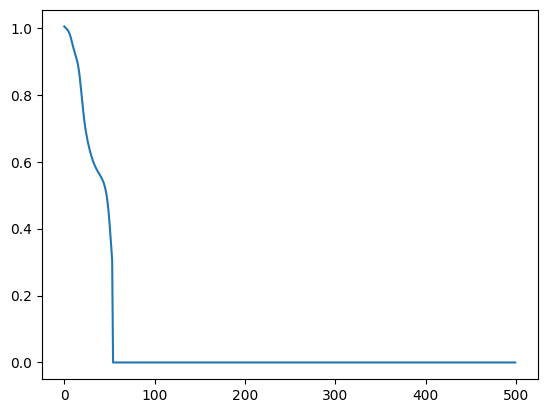

In [ ]:
import matplotlib.pyplot as plt
print('pesos iniciales',pesos_ej1)
errores_epocas = entrenar_red(500,datos_ej1,pesos_ej1,0.05,red_size,0.5)

print('pesos actualizados',pesos_ej1)
#print(errores_v[len(errores_v)-1])
#print(errores_epocas)
plt.plot(errores_epocas)

In [ ]:
# cargamos los datos de prueba
import numpy as np
datos_prueba = np.genfromtxt("XOR_tst.csv", delimiter="," , skip_header=1)
#datos_prueba = datos_prueba[0:99]
datos_prueba_ej1 = np.insert(datos_prueba,0,-1,axis=1)
#print(datos_prueba_ej1)

In [ ]:
# prueba
def prueba_red(datos_prueba,pesos,red_size,a):
  contador_error = 0; salidas_red = np.zeros(len(datos_prueba)); errores_v = []; cant_datos = len(datos_prueba)
  suma = 0
  for i in np.arange(0,cant_datos):
    patron_i = datos_prueba[i]
    entradas = np.array(patron_i[:-1]) # devuelve el vector sin el ultimo elemento
    yd = [patron_i[-1]]
    y = propagacion_adelante(entradas,pesos,red_size,a)
    salidas_red[i]= y[-1]
    error = calculo_error(yd,y[-1])
    if( error != 0):
      contador_error+=1
      suma+=error
  errores_v.append(suma/cant_datos)
  #print(errores_v)
  return salidas_red,errores_v

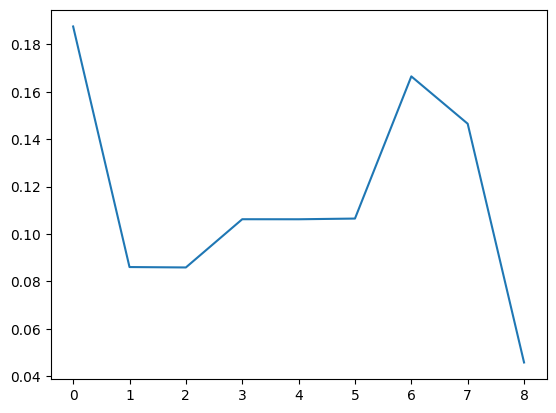

In [ ]:
errores_prueba = []
for n in range(0,9):
  datos_aux = datos_prueba_ej1[n*20:(n+1)*20]
  salidas,errores_salidas = prueba_red(datos_aux,pesos_ej1,red_size,a=0.9)
  errores_prueba.append(errores_salidas)
#for n in np.arange(0,len(datos_pruebas)):
 # print('salida deseada: ',datos_pruebas[n][len(datos_pruebas[n])-1], ' salida red: ',salidas[n])
#print(errores_salidas)
plt.plot(errores_prueba)
plt.show()

## Ejercicio 2
Utilice para entrenamiento y prueba los conjuntos de datos concenttrn.csv y concent tst.csv, que consisten en dos clases distribuidas en forma concentrica como muestra la Figura 1. Determine la estructura de una red de tipo perceptron multicapa que resulte mas apropiada para resolver este
problema. Represente graficamente, con diferentes colores, el resultado de la clasificacion realizada por el perceptron multicapa.


In [ ]:
# cargamos los datos de entrenamiento
import numpy as np
datos_entrenamiento2 = np.genfromtxt("concent_trn.csv", delimiter="," , skip_header=1)
#datos_entrenamiento2 = datos_entrenamiento2[0:99]
# datos_ej2 = []
# for i in np.arange(0,len(datos_entrenamiento2)):
#  datos_ej2.append( np.insert(datos_entrenamiento2[i],0,-1) )
datos_ej2 = np.insert(datos_entrenamiento2,0,-1,axis=1)
print(datos_ej2[0:9])

[[-1.          0.64509132  0.83106262  1.        ]
 [-1.          0.35075317  0.14122327  1.        ]
 [-1.          0.30528354  0.77442304  1.        ]
 [-1.          0.86238723  0.33126522  1.        ]
 [-1.          0.0339309   0.66083573  1.        ]
 [-1.          0.78465603  0.71216752  1.        ]
 [-1.          0.63544211  0.88904904  1.        ]
 [-1.          0.6787576   0.93680237  1.        ]
 [-1.          0.09708674  0.49261626  1.        ]]


In [ ]:
# definimos el tamaño de la red y la cantidad de neuronas en cada capa
red_size_ej2 = [4,1]
#print(np.dot([[1,2],[2,3]],[1,2]))

In [ ]:
# defino la matriz de pesos
pesos_ej2 = []
pesos_ej2.append(np.random.rand(red_size_ej2[0],len(datos_entrenamiento2[0]))-0.5)
for i in np.arange(1,len(red_size_ej2)):
  pesos_ej2.append(np.random.rand(red_size_ej2[i],red_size_ej2[i-1]+1)-0.5)
print(pesos_ej2)

[array([[-0.25242594, -0.15673262, -0.14897605],
       [-0.3182127 ,  0.42065474,  0.04627905],
       [-0.24465184, -0.46113045, -0.0822152 ],
       [-0.40006157,  0.24154012, -0.21892125]]), array([[-3.55097940e-01,  3.92902562e-01, -4.31456474e-01,
         2.42827952e-04,  4.84488837e-01]])]


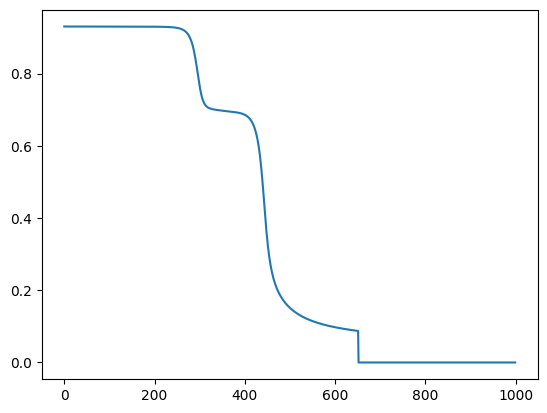

In [ ]:
# entreno la red
errores_v_ej2 = entrenar_red(epocas_max=1000,datos=datos_ej2,pesos=pesos_ej2,eta=0.01,red_size=red_size_ej2,a=0.9)
plt.plot(errores_v_ej2)
plt.show()

In [ ]:
# cargamos los datos de prueba
datos_prueba2 = np.genfromtxt("concent_tst.csv", delimiter="," , skip_header=1)
#datos_prueba2 = datos_prueba2[:99]
# datos_pruebas_ej2 = []
# for i in np.arange(0,len(datos_prueba_ej2)):
#   datos_pruebas_ej2.append( np.insert(datos_prueba_ej2[i],0,-1) )
datos_prueba_ej2 = np.insert(datos_prueba2,0,-1,axis=1)
print(datos_prueba_ej2)

[[-1.          0.85840725  0.37605679  1.        ]
 [-1.          0.09411867  0.41479737  1.        ]
 [-1.          0.6712616   0.11529791  1.        ]
 ...
 [-1.          0.36317742  0.19416855  1.        ]
 [-1.          0.49100246  0.3504763  -1.        ]
 [-1.          0.07623506  0.61705104  1.        ]]


In [ ]:
# prueba de la red
salidas_ej2,errores_v = prueba_red(datos_prueba_ej2,pesos_ej2,red_size_ej2,a=0.9)
for n in np.arange(0,10):
  print('salida deseada: ',datos_prueba_ej2[n][-1], ' salida red: ',salidas_ej2[n])

salida deseada:  1.0  salida red:  0.9249240377872585
salida deseada:  1.0  salida red:  0.8584744989492001
salida deseada:  1.0  salida red:  0.9010740311661942
salida deseada:  1.0  salida red:  0.9407623763905515
salida deseada:  -1.0  salida red:  -0.9930495504480806
salida deseada:  -1.0  salida red:  -0.8558709151479484
salida deseada:  -1.0  salida red:  -0.9460432489307997
salida deseada:  1.0  salida red:  0.9486381958690813
salida deseada:  1.0  salida red:  -0.07980100016046487
salida deseada:  1.0  salida red:  0.9786437718900218


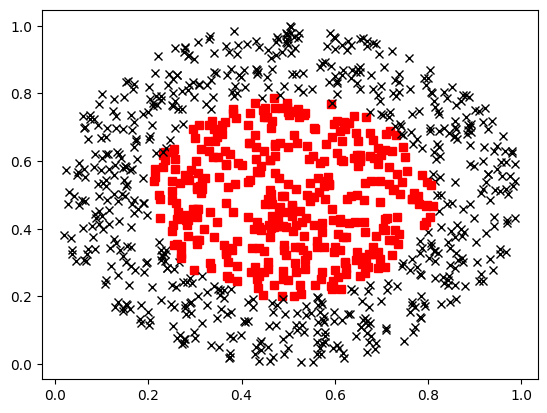

In [ ]:
# dibujamos los resultados
plt.figure('puntos del ejercicio 2')
for n in np.arange(0,len(salidas_ej2)-1):
  nodo = datos_prueba_ej2[n]
  if(salidas_ej2[n] < 0):
    plt.plot(nodo[1],nodo[2],'rs')
  else:
    plt.plot(nodo[1],nodo[2],'kx')
plt.show()

## Ejercicio 3
Iris es el genero de una planta herbacea con flores que se utilizan en decoracion. Dentro de este genero existen muy diversas especies, entre las que
se han estudiado: Iris setosa, Iris versicolor e Iris virginica (ver Figura 2).
Estas tres especies pueden distinguirse segun las dimensiones de sus petalos y
sepalos. Un grupo de investigadores ha recopilado la informacion correspondiente a las longitudes y anchos de los petalos y sepalos de 50 plantas de cada
especie. En el archivo irisbin trn.csv se encuentra el conjunto de entrenamiento, y en irisbin tst.csv el de prueba, generado a partir de estas mediciones (en cm), junto con un codigo binario que indica la clase de cada muestra (especie) reconocida por el grupo de investigadores ([−1, −1, 1] = setosa,
[−1, 1, −1] = versicolor, [1, −1, −1] = virginica).
Determine la estructura optima de un perceptron multicapa para resolver este
problema. Explore como varıa el desempeno al usar distintas tasas de aprendizaje, y para cada caso grafique las curvas de error cuadratico total y error
de clasificacion en funcion de las epocas de entrenamiento.


In [45]:
datos_entrenamiento3 = np.genfromtxt("irisbin_trn.csv", delimiter="," , skip_header=1)
datos_ej3 = np.insert(datos_entrenamiento3,0,-1,axis=1)
print(datos_ej3[0:9])

[[-1.   4.6  3.1  1.5  0.2 -1.  -1.   1. ]
 [-1.   5.8  4.   1.2  0.2 -1.  -1.   1. ]
 [-1.   6.1  2.9  4.7  1.4 -1.   1.  -1. ]
 [-1.   5.6  3.   4.5  1.5 -1.   1.  -1. ]
 [-1.   6.1  3.   4.9  1.8  1.  -1.  -1. ]
 [-1.   5.   3.3  1.4  0.2 -1.  -1.   1. ]
 [-1.   6.1  3.   4.9  1.8  1.  -1.  -1. ]
 [-1.   4.5  2.3  1.3  0.3 -1.  -1.   1. ]
 [-1.   6.1  2.9  4.7  1.4 -1.   1.  -1. ]]


In [46]:
# red size
red_size_ej3 = [4,3]


In [47]:
# pesos
# defino la matriz de pesos
pesos_ej3 = np.full(len(red_size_ej3),None)
pesos_ej3[0] = np.random.rand(red_size_ej3[0],len(datos_entrenamiento3[0])-2)-0.5
for i in np.arange(1,len(red_size_ej3)):
  pesos_ej3[i] = np.random.rand(red_size_ej3[i],red_size_ej3[i-1]+1)-0.5
print(pesos_ej3)

[array([[ 0.19737168, -0.20184639, -0.2808818 , -0.47735233,  0.37081488],
        [-0.09598387,  0.41012717,  0.0916096 , -0.08511907,  0.26118574],
        [ 0.25864459,  0.12300351,  0.39836756,  0.16595457,  0.45824806],
        [ 0.14836204,  0.3647532 , -0.44361397, -0.15861945, -0.07639857]])
 array([[-0.46584771, -0.23093699,  0.20056061,  0.1687578 ,  0.20204444],
        [ 0.36687392,  0.38406013, -0.36672298,  0.14986393,  0.31923928],
        [ 0.03016579,  0.1138694 ,  0.06717484,  0.20511954, -0.30712577]])]


In [48]:
def corregir_salida(y):
  i_max = np.argmax(y)
  y_corregido = np.ones(len(y))*(-1)
  y_corregido[i_max] = 1
  return y_corregido


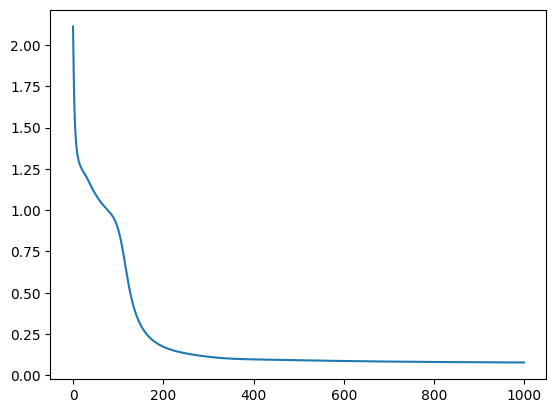

In [54]:
# entrenamiento
def entrenar_red_ej3(epocas_max,datos,pesos,eta,red_size,a):
  epoca = 0; errores_epocas = np.zeros(epocas_max); cant_datos = len(datos)
  while (epoca < epocas_max):
    for i in np.arange(0,cant_datos):
      patron_i = datos[i]
      entradas = np.array(patron_i[:-3])
      yd = patron_i[-3:]
      y = propagacion_adelante(entradas,pesos,red_size,a)
      deltas = propagacion_atras( y,yd,pesos,red_size )
      pesos = actualizo_pesos(deltas,entradas,y,pesos,eta,red_size)
    # evaluo desempeño
    contador_error = 0; suma = 0
    for i in np.arange(0,cant_datos):
      patron_i = datos[i]
      entradas = np.array(patron_i[:-3])
      yd = patron_i[-3:]
      y = propagacion_adelante(entradas,pesos,red_size,a)
      error = calculo_error(yd,y[-1])
      suma+=error
      #print(y[-1])
      #print(np.sign(y[-1]))
      y_final = corregir_salida(y[-1])
      # if (y_final != yd[0]).all():s
      if (np.array_equal(y_final,yd)):
        contador_error+=1
    #print("contador e ",contador_error)
    if ( contador_error/cant_datos < 0.001):
      break
    errores_epocas[epoca] = suma/cant_datos
    epoca+=1
  return errores_epocas

import matplotlib.pyplot as plt
errores_v_ej3 = entrenar_red_ej3(epocas_max=1000,datos=datos_ej3,pesos=pesos_ej3,eta=0.01,red_size=red_size_ej3,a=0.9)
plt.plot(errores_v_ej3)
plt.show()

In [55]:
# prueba
# [−1, −1, 1] = setosa, [−1, 1, −1] = versicolor, [1, −1, −1] = virginica
# cargamos los datos de prueba
datos_prueba3 = np.genfromtxt("irisbin_tst.csv", delimiter="," , skip_header=1)
datos_prueba_ej3 = np.insert(datos_prueba3,0,-1,axis=1)
print(datos_prueba_ej3)

[[-1.   6.2  2.9  4.3  1.3 -1.   1.  -1. ]
 [-1.   4.6  3.4  1.4  0.3 -1.  -1.   1. ]
 [-1.   5.4  3.9  1.7  0.4 -1.  -1.   1. ]
 [-1.   5.3  3.7  1.5  0.2 -1.  -1.   1. ]
 [-1.   5.1  3.8  1.9  0.4 -1.  -1.   1. ]
 [-1.   6.4  3.1  5.5  1.8  1.  -1.  -1. ]
 [-1.   7.7  2.6  6.9  2.3  1.  -1.  -1. ]
 [-1.   6.3  2.5  5.   1.9  1.  -1.  -1. ]
 [-1.   7.2  3.   5.8  1.6  1.  -1.  -1. ]
 [-1.   5.6  2.8  4.9  2.   1.  -1.  -1. ]
 [-1.   5.9  3.   5.1  1.8  1.  -1.  -1. ]
 [-1.   5.5  2.3  4.   1.3 -1.   1.  -1. ]
 [-1.   6.2  2.9  4.3  1.3 -1.   1.  -1. ]
 [-1.   4.6  3.1  1.5  0.2 -1.  -1.   1. ]
 [-1.   5.8  4.   1.2  0.2 -1.  -1.   1. ]
 [-1.   5.   3.3  1.4  0.2 -1.  -1.   1. ]
 [-1.   6.2  2.9  4.3  1.3 -1.   1.  -1. ]
 [-1.   5.   3.3  1.4  0.2 -1.  -1.   1. ]
 [-1.   6.2  2.9  4.3  1.3 -1.   1.  -1. ]
 [-1.   6.1  2.6  5.6  1.4  1.  -1.  -1. ]
 [-1.   5.6  3.   4.5  1.5 -1.   1.  -1. ]
 [-1.   7.7  3.8  6.7  2.2  1.  -1.  -1. ]
 [-1.   6.1  2.9  4.7  1.4 -1.   1.  -1. ]
 [-1.   6.3

In [56]:
def prueba_red2(datos_prueba,pesos,red_size,a):
  contador_error = 0; salidas_red = np.full(len(datos_prueba),None); errores_v = []; cant_datos = len(datos_prueba)
  suma = 0
  for i in np.arange(0,cant_datos):
    patron_i = datos_prueba[i]
    entradas = np.array(patron_i[:-3]) # devuelve el vector sin el ultimo elemento
    yd = patron_i[-3:]
    y = propagacion_adelante(entradas,pesos,red_size,a)
    # salidas_red[i]= y[-1]
    salidas_red[i]= corregir_salida(y[-1])
    error = calculo_error(yd,y[-1])
    if( error != 0):
      contador_error+=1
      suma+=error
  errores_v.append(suma/cant_datos)
  #print(errores_v)
  return salidas_red,errores_v

salidas_ej3,errores_v3 = prueba_red2(datos_prueba_ej3,pesos_ej3,red_size_ej3,a=0.9)
for n in np.arange(0,len(datos_prueba_ej3)):
  print('salida deseada: ',datos_prueba_ej3[n][-3:], ' salida red: ',salidas_ej3[n])

salida deseada:  [-1.  1. -1.]  salida red:  [-1.  1. -1.]
salida deseada:  [-1. -1.  1.]  salida red:  [-1. -1.  1.]
salida deseada:  [-1. -1.  1.]  salida red:  [-1. -1.  1.]
salida deseada:  [-1. -1.  1.]  salida red:  [-1. -1.  1.]
salida deseada:  [-1. -1.  1.]  salida red:  [-1. -1.  1.]
salida deseada:  [ 1. -1. -1.]  salida red:  [ 1. -1. -1.]
salida deseada:  [ 1. -1. -1.]  salida red:  [ 1. -1. -1.]
salida deseada:  [ 1. -1. -1.]  salida red:  [ 1. -1. -1.]
salida deseada:  [ 1. -1. -1.]  salida red:  [ 1. -1. -1.]
salida deseada:  [ 1. -1. -1.]  salida red:  [ 1. -1. -1.]
salida deseada:  [ 1. -1. -1.]  salida red:  [ 1. -1. -1.]
salida deseada:  [-1.  1. -1.]  salida red:  [-1.  1. -1.]
salida deseada:  [-1.  1. -1.]  salida red:  [-1.  1. -1.]
salida deseada:  [-1. -1.  1.]  salida red:  [-1. -1.  1.]
salida deseada:  [-1. -1.  1.]  salida red:  [-1. -1.  1.]
salida deseada:  [-1. -1.  1.]  salida red:  [-1. -1.  1.]
salida deseada:  [-1.  1. -1.]  salida red:  [-1.  1. -1